In [3]:
!pip install pandas

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB 1.4 MB/s eta 0:00:08
     --------------------------------------- 0.1/10.7 MB 919.0 kB/s eta 0:00:12
      --------------------------------------- 0.2/10.7 MB 1.3 MB/s eta 0:00:09
      --------------------------------------- 0.3/10.7 MB 1.5 MB/s eta 0:00:08
     - -------------------------------------- 0.4/10.7 MB 1.8 MB/s eta 0:00:06
     - -------------------------------------- 0.5/10.7 MB 1.9 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/10.7 MB 1.8 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/10.7 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/10.7 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/10.7 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/10.7 MB 1.6 MB/s eta 0:00:07
     --- ------------------------------------ 0.9/10.7 MB 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os
from numpy.random import seed
seed(101)
import tensorflow as tf
tf.random.set_seed(101)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [5]:
IMAGE_SIZE = 50   
SAMPLE_SIZE =  60 

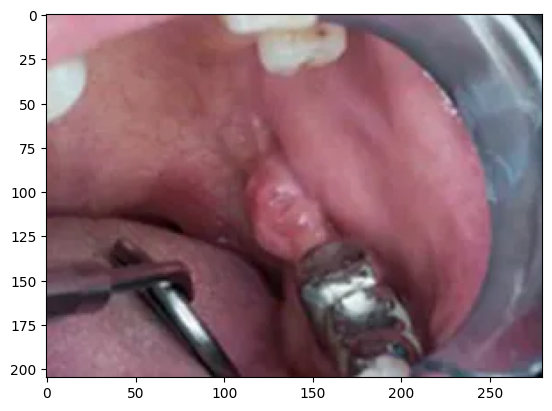

In [ ]:
%matplotlib inline
 
# Read in the image
image = cv2.imread('images/1/slide2.webp')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

c:\Users\WORK\anaconda3\envs\tf_cv2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


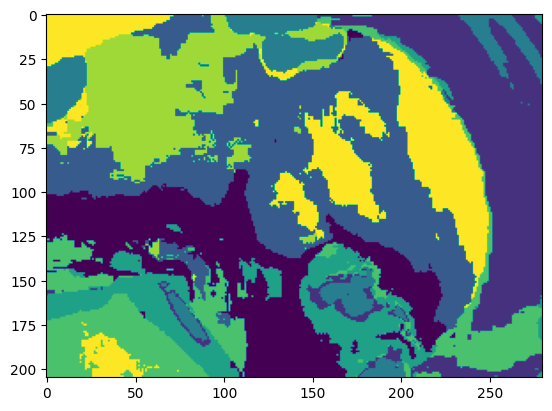

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import cv2

image = cv2.imread("dataImage/1/slide2.jpg")
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

data = image_lab.reshape((-1, 3))
scaler = StandardScaler()
data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
labels = kmeans.labels_

segmented_image = labels.reshape(image_lab.shape[:2])
plt.imshow(segmented_image)
plt.show()

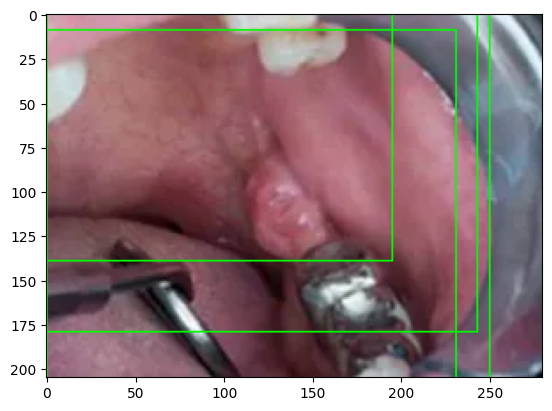

In [10]:
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
centers = centers.reshape((1, -1, 3)).astype(np.uint8)
centers = cv2.cvtColor(centers, cv2.COLOR_LAB2BGR).reshape((-1, 3))

for i, center in enumerate(centers):
    mask = labels.reshape(image.shape[:2]) == i
    mask = mask.astype(np.uint8) * 255

    x, y, w, h = cv2.boundingRect(mask)
    # print(x ,y, w, h)
    # print('w = ', w)
    # print('h = ', h)
    # h = 50
    # w = 50
    # Draw rectangle 
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    cropImg = image[y: y + h, x : x + w]
    cv2.imwrite("Croped/test"+ str(i) +".png", cropImg)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
method = KMeans(n_clusters=12)
method.fit(data)
labels = method.labels_
method.n_clusters


c:\Users\WORK\anaconda3\envs\tf_cv2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12

In [12]:
os.mkdir("Croped")
os.mkdir("data")
os.mkdir("data/0")
os.mkdir("data/1")

In [13]:
def deleteImage(folder):
    for file in os.listdir(folder):
        file_path = os.path.join("Croped", file)
        if os.path.isfile(file_path):
            os.remove(file_path)

def resizedImage(pathImage):
    #Read orginal image
    image = cv2.imread(pathImage)

    # Resize image
    resized_image = cv2.resize(image, (50, 50))
    return resized_image

def cropImage(pathImage, method):
    
    # Read image and convert to LAB color
    image = cv2.imread(pathImage)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    #Standardized data
    data = image_lab.reshape((-1, 3))
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    method.fit(data)
    labels = method.labels_
    
    for i in range(method.n_clusters):
        mask = labels.reshape(image.shape[:2]) == i
        mask = mask.astype(np.uint8) * 255
        x, y, w, h = cv2.boundingRect(mask)
        cropImg = image[y: y + h, x : x + w]
        cv2.imwrite("Croped/crop"+ str(i) +".png", cropImg)

def minImage(foler_path):

    file_list = os.listdir(foler_path)

    image_files = [file for file in file_list if file.endswith(('.jpg', '.png', "webp"))]

    smallest_size = float('inf')
    smallest_image_path = None

    for image_file in image_files:
        image_path = os.path.join(foler_path, image_file)
        image = cv2.imread(image_path)
        
        height, width, _ = image.shape
        
        if height * width < smallest_size:
            smallest_size = height * width
            smallest_image_path = image_path

    return smallest_image_path
    

In [ ]:
for img in os.listdir("dataImage/0/"):
    cropImage(os.path.join("dataImage/0/", img), method)
    cv2.imwrite(os.path.join("data/0", img),resizedImage(minImage("Croped")))
    deleteImage("Croped")

In [ ]:
for img in os.listdir("dataImage/1/"):
    cropImage(os.path.join("dataImage/1", img), method)
    cv2.imwrite(os.path.join("data/1", img),resizedImage(minImage("Croped")))
    deleteImage("Croped")

c:\Users\lamth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lamth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lamth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lamth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

# Buiding Model

In [ ]:
image_list_0 = os.listdir("data/0")
image_list_1 = os.listdir("data/1")

In [ ]:
image_list_0 = os.listdir("data/0")
image_list_1 = os.listdir("data/1")

data_0 = {
    "image": image_list_0,
    "target": [0] * len(image_list_0)
}

data_1 = {
    "image": image_list_1,
    "target": [1] * len(image_list_1)
}

df_0 = pd.DataFrame(data_0).sample(SAMPLE_SIZE, random_state= 101)
df_1 = pd.DataFrame(data_1).sample(SAMPLE_SIZE, random_state= 101)

df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

df_data['target'].value_counts()

target
0    60
1    60
Name: count, dtype: int64

In [ ]:
df_train, df_val = train_test_split(df_data, test_size=0.2, random_state=101)

print(df_train.shape)
print(df_val.shape)

(96, 2)
(24, 2)


In [ ]:
base_dir = 'base_dir'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

no_cancer = os.path.join(train_dir, '0')
os.mkdir(no_cancer)
cancer = os.path.join(train_dir, '1')
os.mkdir(cancer)

no_cancer = os.path.join(val_dir, '0')
os.mkdir(no_cancer)
cancer = os.path.join(val_dir, '1')
os.mkdir(cancer)

In [ ]:
df_data.set_index('image', inplace=True)
train_list = list(df_train['image'])
val_list = list(df_val['image'])

In [ ]:
for image in train_list:
    fname = image
    target = df_data.loc[image,'target']
    src = os.path.join("data", str(target), fname)
    dst = os.path.join(train_dir, str(target), fname)
    shutil.move(src, dst)

In [ ]:
for image in val_list:
    fname = image
    target = df_data.loc[image,'target']
    src = os.path.join("data", str(target), fname)
    dst = os.path.join(val_dir, str(target), fname)
    shutil.move(src, dst)

In [ ]:
train_path = "base_dir/train_dir"
valid_path = "base_dir/val_dir"


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')


test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical')

Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 11, 11, 64)       

In [ ]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=60, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/60
 9/10 [==========================>...] - ETA: 0s - loss: 0.6949 - accuracy: 0.5581
Epoch 1: val_accuracy improved from -inf to 0.54167, saving model to model.h5
10/10 [==============================] - 5s 128ms/step - loss: 0.6991 - accuracy: 0.5417 - val_loss: 0.6918 - val_accuracy: 0.5417 - lr: 1.0000e-04
Epoch 2/60
 9/10 [==========================>...] - ETA: 0s - loss: 0.6889 - accuracy: 0.5814
Epoch 2: val_accuracy did not improve from 0.54167
10/10 [==============================] - 1s 50ms/step - loss: 0.6919 - accuracy: 0.5625 - val_loss: 0.6920 - val_accuracy: 0.5417 - lr: 1.0000e-04
Epoch 3/60
 9/10 [==========================>...] - ETA: 0s - loss: 0.6825 - accuracy: 0.5930
Epoch 3: val_accuracy did not improve from 0.54167
10/10 [==============================] - 1s 49ms/step - loss: 0.6869 - accuracy: 0.5729 - val_loss: 0.6920 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/60
 9/10 [==========================>...] - ETA: 0s - loss: 0.6976 - accuracy: 0.4651
Ep

In [ ]:
model.save("model.h5", include_optimizer=True)
model.load_weights("model.h5")
val_loss, val_accuracy = model.evaluate(test_gen,  steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_accuracy)

24/24 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.7083
val_loss: 0.6891016364097595
val_acc: 0.7083333134651184


In [ ]:
shutil.rmtree("base_dir")
shutil.rmtree("Croped")
shutil.rmtree("data")